# KDEs of best achieved fitnesses

In [1]:
import os
import pickle
from itertools import product

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pycgp import probabilistic_mutation, point_mutation, single_mutation
from pycgp.gems import MatchByActiveStrategy, MatchSMStrategy, MatchPMStrategy

from utils import DataIterator
        
    

# Symbolic regression

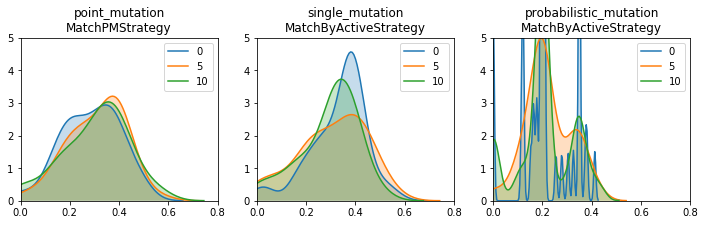

In [2]:
symreg = DataIterator('scripts/symbolic_out')

choices = [
    (point_mutation, MatchPMStrategy),
    (single_mutation, MatchByActiveStrategy),
    (probabilistic_mutation, MatchByActiveStrategy)
]

for m, s, g, ax, values in symreg.iterate_axes(lambda x: x['best'].fitness, choices):
    sns.kdeplot(values, ax=ax, shade=True, label=g)
    ax.set_xlim(0, 0.8)
    ax.set_ylim(0, 5)

plt.savefig('figures/sr-kdes.pdf', format='pdf', dpi=1000)
plt.savefig('figures/sr-kdes.svg', format='svg', dpi=1000)

# Binary classification - train error

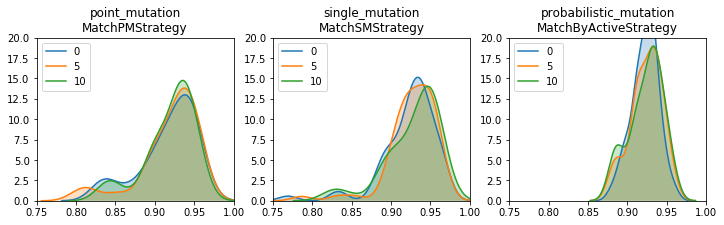

In [3]:
bincls = DataIterator('scripts/bin_class_out/')

choices = [
    (point_mutation, MatchPMStrategy),
    (single_mutation, MatchSMStrategy),
    (probabilistic_mutation, MatchByActiveStrategy)
]


for m, s, g, ax, values in bincls.iterate_axes(lambda x: -x['best'].fitness, choices):
    sns.kdeplot(values, ax=ax, shade=True, label=g)
    ax.set_xlim(0.75, 1)
    ax.set_ylim(0, 20)

# Binary classification - test error

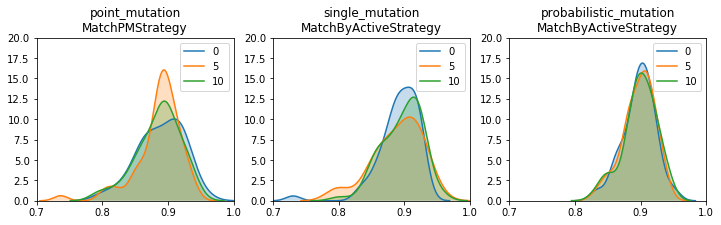

In [4]:
bincls = DataIterator('scripts/bin_class_out/')

from pycgp.benchmarks.classification import cost_func, X_test, y_test

choices = [
    (point_mutation, MatchPMStrategy),
    (single_mutation, MatchByActiveStrategy),
    (probabilistic_mutation, MatchByActiveStrategy)
]


for m, s, g, ax, values in bincls.iterate_axes(lambda x: -cost_func(y_test, x['best'].execute(X_test)), choices):
    sns.kdeplot(values, ax=ax, shade=True, label=g)
    ax.set_xlim(0.7, 1)
    ax.set_ylim(0, 20)
    
plt.savefig('figures/bc-kdes.pdf', format='pdf', dpi=1000)
plt.savefig('figures/bc-kdes.svg', format='svg', dpi=1000)

# Santa Fe

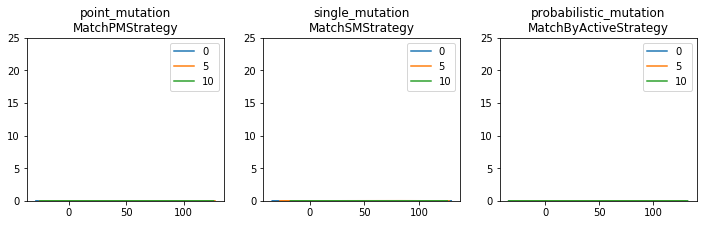

In [13]:
santaf = DataIterator('scripts/santa_fe_out//')

choices = [
    (point_mutation, MatchPMStrategy),
    (single_mutation, MatchSMStrategy),
    (probabilistic_mutation, MatchByActiveStrategy)
]


for m, s, g, ax, values in santaf.iterate_axes(lambda x: -x['best'].fitness, choices):
    sns.kdeplot(values, ax=ax, shade=True, label=g)
    ax.set_xlim(0, 89)
    ax.set_ylim(0, 25)
    
plt.savefig('figures/sf-kdes.pdf', format='pdf', dpi=1000)
plt.savefig('figures/sf-kdes.svg', format='svg', dpi=1000)

# Symbolic regression LaTeX output

TODO: use [to_latex](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_latex.html) from pandas

In [6]:
ldata = {}

for m, s, g, c, d in symreg.iterate_folder():
    values = [x['best'].fitness for x in d]
    stats = [g, c, np.min(values), np.mean(values), np.std(values)]
    ldata[f'{m}-{s}-{g}-{c}'] = stats

for k, v in ldata.items():
    row_str = '{} & {} & {:.3f} & {:.3f}\\pm {:.3f}'.format(*v)
    print(f'{k}\t', row_str)

probabilistic_mutation-MatchSMStrategy-0-10	 0 & 10 & 0.121 & 0.243\pm 0.076
probabilistic_mutation-MatchSMStrategy-0-50	 0 & 50 & 0.000 & 0.175\pm 0.089
probabilistic_mutation-MatchSMStrategy-0-100	 0 & 100 & 0.000 & 0.213\pm 0.094
probabilistic_mutation-MatchSMStrategy-5-10	 5 & 10 & 0.000 & 0.199\pm 0.078
probabilistic_mutation-MatchSMStrategy-5-50	 5 & 50 & 0.000 & 0.175\pm 0.089
probabilistic_mutation-MatchSMStrategy-5-100	 5 & 100 & 0.000 & 0.213\pm 0.094
probabilistic_mutation-MatchSMStrategy-10-10	 10 & 10 & 0.000 & 0.181\pm 0.070
probabilistic_mutation-MatchSMStrategy-10-50	 10 & 50 & 0.000 & 0.175\pm 0.089
probabilistic_mutation-MatchSMStrategy-10-100	 10 & 100 & 0.000 & 0.213\pm 0.094
point_mutation-MatchPMStrategy-0-10	 0 & 10 & 0.121 & 0.296\pm 0.117
point_mutation-MatchPMStrategy-0-50	 0 & 50 & 0.000 & 0.272\pm 0.134
point_mutation-MatchPMStrategy-0-100	 0 & 100 & 0.118 & 0.290\pm 0.086
point_mutation-MatchPMStrategy-5-10	 5 & 10 & 0.095 & 0.319\pm 0.127
point_mutation-Ma

# Binary classification LaTeX output

In [7]:
ldata = {}

for m, s, g, c, d in bincls.iterate_folder():
    values = [-cost_func(y_test, x['best'].execute(X_test)) for x in d]
    stats = [g, c, np.max(values), np.mean(values), np.std(values)]
    ldata[f'{m}-{s}-{g}-{c}'] = stats

for k, v in ldata.items():
    row_str = '{} & {} & {:.3f} & {:.3f}\\pm {:.3f}'.format(*v)
    print(f'{k}\t', row_str)   

probabilistic_mutation-MatchSMStrategy-0-10	 0 & 10 & 0.918 & 0.892\pm 0.022
probabilistic_mutation-MatchSMStrategy-0-50	 0 & 50 & 0.947 & 0.895\pm 0.028
probabilistic_mutation-MatchSMStrategy-0-100	 0 & 100 & 0.953 & 0.906\pm 0.021
probabilistic_mutation-MatchSMStrategy-5-10	 5 & 10 & 0.936 & 0.892\pm 0.027
probabilistic_mutation-MatchSMStrategy-5-50	 5 & 50 & 0.947 & 0.895\pm 0.028
probabilistic_mutation-MatchSMStrategy-5-100	 5 & 100 & 0.953 & 0.906\pm 0.021
probabilistic_mutation-MatchSMStrategy-10-10	 10 & 10 & 0.936 & 0.892\pm 0.027
probabilistic_mutation-MatchSMStrategy-10-50	 10 & 50 & 0.947 & 0.895\pm 0.028
probabilistic_mutation-MatchSMStrategy-10-100	 10 & 100 & 0.953 & 0.906\pm 0.021
point_mutation-MatchPMStrategy-0-10	 0 & 10 & 0.942 & 0.870\pm 0.036
point_mutation-MatchPMStrategy-0-50	 0 & 50 & 0.930 & 0.895\pm 0.027
point_mutation-MatchPMStrategy-0-100	 0 & 100 & 0.959 & 0.903\pm 0.031
point_mutation-MatchPMStrategy-5-10	 5 & 10 & 0.918 & 0.869\pm 0.032
point_mutation-Ma

In [8]:
data = []

for m, s, g, c, d in bincls.iterate_folder():
    values = [-x['best'].fitness for x in d]
    stats = [m, s, g, c, np.max(values), np.mean(values), np.std(values)]
    data.append(stats)

data = pd.DataFrame(data)
data.columns = ['m', 's', 'g', 'c', 'best', 'mean', 'std']
data.groupby([
    'm','s','g'
]).mean()

c      best  \
m                      s                     g                         
point_mutation         MatchPMStrategy       0   53.333333  0.953936   
                                             5   53.333333  0.958961   
                                             10  53.333333  0.954774   
probabilistic_mutation MatchByActiveStrategy 0   53.333333  0.948911   
                                             5   53.333333  0.951424   
                                             10  53.333333  0.954774   
                       MatchSMStrategy       0   53.333333  0.948911   
                                             5   53.333333  0.952261   
                                             10  53.333333  0.952261   
single_mutation        MatchByActiveStrategy 0   53.333333  0.955611   
                                             5   53.333333  0.961474   
                                             10  53.333333  0.960637   
                       MatchSMStrategy       0   53.333333  0.955611   
                                             5   53.333333  0.963149   
                                             10  53.333333  0.963987   

                                                     mean       std  
m                      s                     g                       
point_mutation         MatchPMStrategy       0   0.917379  0.027998  
                                             5   0.918970  0.029768  
                                             10  0.919179  0.026659  
probabilistic_mutation MatchByActiveStrategy 0   0.922571  0.014808  
                                             5   0.923660  0.015833  
                                             10  0.923492  0.018532  
                       MatchSMStrategy       0   0.922571  0.014808  
                                             5   0.920519  0.018233  
                                             10  0.920519  0.018233  
single_mutation        MatchByActiveStrategy 0   0.923325  0.027167  
                                             5   0.921734  0.026570  
                                             10  0.925670  0.022531  
                       MatchSMStrategy       0   0.923325  0.027167  
                                             5   0.927094  0.025903  
                                             10  0.927513  0.030185

# Santa Fe LaTex output

In [9]:
ldata = {}

for m, s, g, c, d in symreg.iterate_folder():
    values = [x['best'].fitness for x in d]
    stats = [g, c, np.max(values), np.mean(values), np.std(values)]
    ldata[f'{m}-{s}-{g}-{c}'] = stats

for k, v in ldata.items():
    row_str = '{} & {} & {:.3f} & {:.3f}\\pm {:.3f}'.format(*v)
    print(f'{k}\t', row_str)   

probabilistic_mutation-MatchSMStrategy-0-10	 0 & 10 & 0.381 & 0.243\pm 0.076
probabilistic_mutation-MatchSMStrategy-0-50	 0 & 50 & 0.350 & 0.175\pm 0.089
probabilistic_mutation-MatchSMStrategy-0-100	 0 & 100 & 0.413 & 0.213\pm 0.094
probabilistic_mutation-MatchSMStrategy-5-10	 5 & 10 & 0.412 & 0.199\pm 0.078
probabilistic_mutation-MatchSMStrategy-5-50	 5 & 50 & 0.350 & 0.175\pm 0.089
probabilistic_mutation-MatchSMStrategy-5-100	 5 & 100 & 0.413 & 0.213\pm 0.094
probabilistic_mutation-MatchSMStrategy-10-10	 10 & 10 & 0.328 & 0.181\pm 0.070
probabilistic_mutation-MatchSMStrategy-10-50	 10 & 50 & 0.350 & 0.175\pm 0.089
probabilistic_mutation-MatchSMStrategy-10-100	 10 & 100 & 0.413 & 0.213\pm 0.094
point_mutation-MatchPMStrategy-0-10	 0 & 10 & 0.498 & 0.296\pm 0.117
point_mutation-MatchPMStrategy-0-50	 0 & 50 & 0.484 & 0.272\pm 0.134
point_mutation-MatchPMStrategy-0-100	 0 & 100 & 0.449 & 0.290\pm 0.086
point_mutation-MatchPMStrategy-5-10	 5 & 10 & 0.492 & 0.319\pm 0.127
point_mutation-Ma